Missing values before handling:
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64
Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



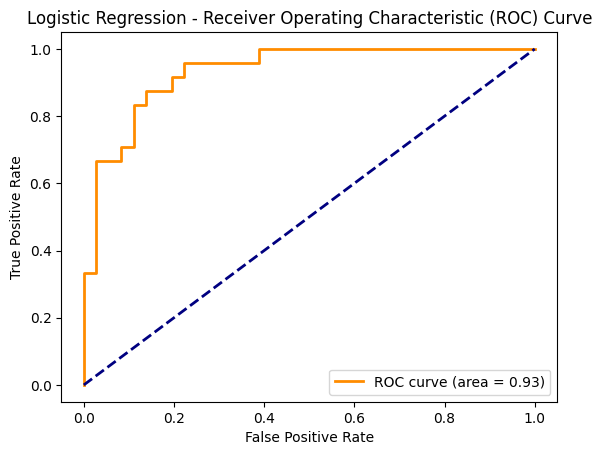

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Data/Heart.csv')

# Replace infinite values with NaN
df.replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Check for missing values and handle them
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values (you can choose an appropriate strategy)
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['ChestPain'] = label_encoder.fit_transform(df['ChestPain'])
df['Thal'] = label_encoder.fit_transform(df['Thal'])
df['AHD'] = label_encoder.fit_transform(df['AHD'])

# Split the dataset into features (X) and target variable (y)
X = df.drop('AHD', axis=1)
y = df['AHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_output = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

# Plot the ROC curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()